In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/fast/Desktop/Assignment/Recommandation Rules/book (1).csv",sep=',',encoding='latin-1')

In [6]:
df=df.iloc[:,1:5]

In [7]:
df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.columns

Index(['User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [11]:
df.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [12]:
import matplotlib.pyplot as plt

In [13]:
df1=df.rename(columns={"User.ID":"User_id","Book.Title":"Title","Book.Rating":"rating"})

In [14]:
df1.columns

Index(['User_id', 'Title', 'rating'], dtype='object')

In [15]:
import seaborn as sns

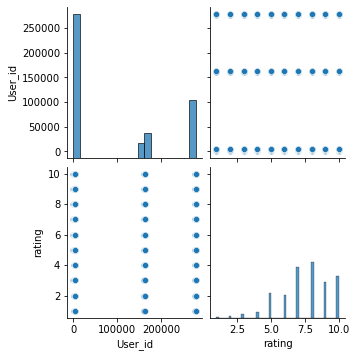

In [16]:
sns.pairplot(df1)

C:\Users\fast\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User_id', ylabel='Density'>

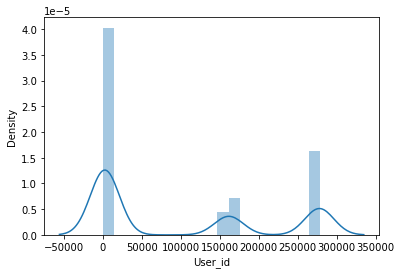

In [17]:
sns.distplot(df1.User_id)

C:\Users\fast\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

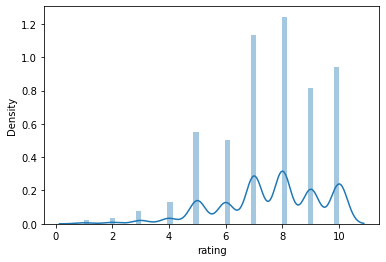

In [18]:
sns.distplot(df1.rating)

In [19]:
df1.corr()

,User_id,rating
User_id,1.000000,-0.041523
rating,-0.041523,1.000000


In [20]:
df1.columns

Index(['User_id', 'Title', 'rating'], dtype='object')

In [21]:
#number of unique users in the dataset
len(df1.User_id.unique())

2182

In [22]:
len(df1.Title.unique())

9659

In [23]:
df1=df1.drop_duplicates(['User_id'])

In [24]:
df2 = df1.pivot(index='User_id',
                                 columns='Title',
                                 values='rating').reset_index(drop=True)

In [25]:
df2

Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2.index = df1.User_id.unique()

In [27]:
df2

Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Impute those NaNs with 0 values
df2.fillna(0, inplace=True)

In [29]:
df2

Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df2.columns

Index([''48',
       ''O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities',
       '101 Bright Ideas: Esl Activities for All Ages', '101 Dalmatians',
       '11th Hour', '13 99 Euros', '20,001 Names for Baby',
       '2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses',
       '2061: Odyssey Three', '253',
       ...
       'Your Oasis on Flame Lake',
       'Yours, Mine And ...Ours (Silhouette Special Edition, No 682)',
       'Yukon Ho!', 'Yuwipi: Vision and Experience in Oglala Ritual',
       'Zeit im Wind.',
       'Zen in the Art of Archery (Vintage Spiritual Classics)',
       'Zlateh the Goat and Other Stories', 'Zodiac: The Eco-Thriller',
       'Zombies of the Gene Pool',
       'Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)'],
      dtype='object', name='Title', length=2163)

In [31]:
df2.describe()

Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,...,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,0.003208,0.003666,0.004125,0.004125,0.003208,0.003208,0.004583,0.003666,0.003666,0.002291,...,0.003208,0.003208,0.003208,0.003666,0.004583,0.003666,0.003208,0.002291,0.002750,0.003666
std,0.149855,0.171263,0.192670,0.192670,0.149855,0.149855,0.214078,0.171263,0.171263,0.107039,...,0.149855,0.149855,0.149855,0.171263,0.214078,0.171263,0.149855,0.107039,0.128447,0.171263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,8.000000,9.000000,9.000000,7.000000,7.000000,10.000000,8.000000,8.000000,5.000000,...,7.000000,7.000000,7.000000,8.000000,10.000000,8.000000,7.000000,5.000000,6.000000,8.000000


In [33]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [34]:
user_sim = 1 - pairwise_distances( df2.values,metric='cosine')

In [35]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [37]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
#Set the index and column names to user ids 
user_sim_df.index = df1.User_id.unique()
user_sim_df.columns = df1.User_id.unique()

In [39]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [40]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [41]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [42]:
df1[(df1['User_id']==276726) | (df1['User_id']==276744)]

,User_id,Title,rating
0,276726,Classical Mythology,5
5,276744,The Kitchen God's Wife,7


In [45]:
user_1=df1[df1['User_id']==276736]

In [46]:
user_2=df1[df1['User_id']==276744]

In [47]:
user_2.Title

5    The Kitchen God's Wife
Name: Title, dtype: object

In [48]:
user_1.Title

3    Flu: The Story of the Great Influenza Pandemic...
Name: Title, dtype: object

In [49]:
pd.merge(user_1,user_2,on='Title',how='outer')

,User_id_x,Title,rating_x,User_id_y,rating_y
0,276736.0,Flu: The Story of the Great Influenza Pandemic...,8.0,NaN,NaN
1,NaN,The Kitchen God's Wife,NaN,276744.0,7.0
